### TITANIC PROJECT

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.dtypes

As per the above observations we can see that some of the independent variables have integers and some of them have object and our target variable 'Survived ' have integer by means it have classes , so from that we can say that it is a classification problem

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in 'Age' column, 687 in 'Cabin' and 2 in 'Embarked' column

In [8]:
df.loc[df['Survived']=='']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are no empty spaces in Dataset 

In [9]:
#fill NaN's 
median = df['Age'].median()
df['Age'].fillna(median,inplace = True)

mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode,inplace = True)

Fill null values, for 'Age' we are using median() because age have ordinal data and for 'Embarked' we are using mode() because 'Embarked' have nominal data  

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

As we can see there are no null values available in the dataset

In [12]:
df['Family'] = df['SibSp']+df['Parch']

Creating new column as Family by combining 'SibSp'(Siblings) + 'Parch'(Parent Child)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


New column Added

In [14]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

Droping the ['PassengerId','Name','Ticket'] columns because they doesnt have that much corelation passenger survival rate and droping ['Cabin'] because there are only 21% data in this column means 78% data is not there 

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [16]:
df.shape

(891, 9)

0    549
1    342
Name: Survived, dtype: int64


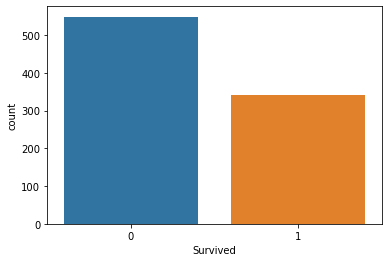

In [17]:
sns.countplot(df['Survived'])
print(df['Survived'].value_counts())

Ouur target variable 'Survived' have 2 classes and we can see , Not much class imbalance between the both

male      577
female    314
Name: Sex, dtype: int64


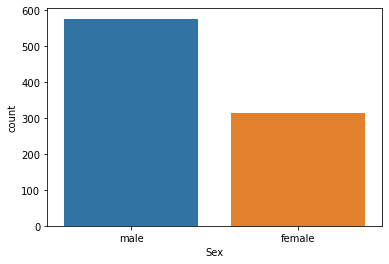

In [18]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

Sex column have 2 classes and males are more than females

S    646
C    168
Q     77
Name: Embarked, dtype: int64


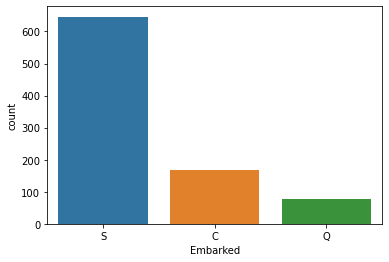

In [19]:
sns.countplot(df['Embarked'])
print(df['Embarked'].value_counts())

Embarked column have 3 classes and more passengers are embarked from 'S'

In [20]:
lab_enc = LabelEncoder()
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])
df['Sex'] = lab_enc.fit_transform(df['Sex'])

Embarked and Sex column have categorical data so we have to Encode it

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

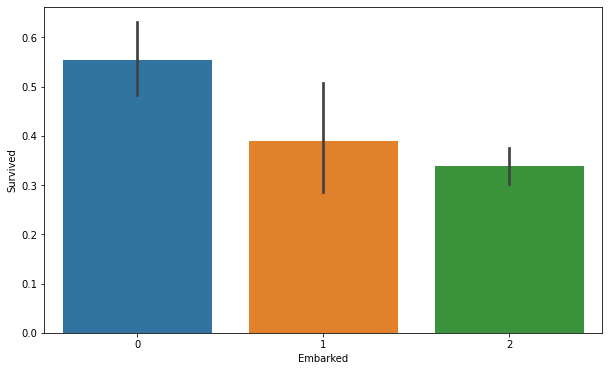

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Embarked', y='Survived', data = df)

By observing above plot we can say that passengers embarked from 'S' have more survival rate

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

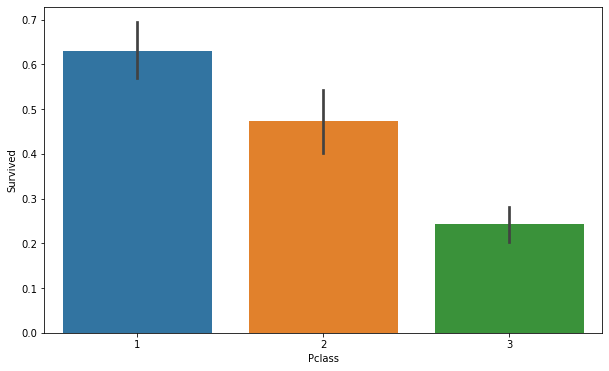

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Pclass', y='Survived', data = df)

By observing above plot we can say that passengers from pclass 1have more survival rate

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

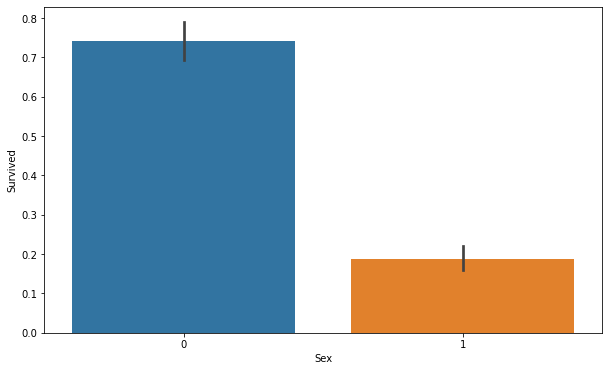

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Sex', y='Survived', data = df)

Male category have more survival rate because males are more than females

<AxesSubplot:xlabel='Family', ylabel='Survived'>

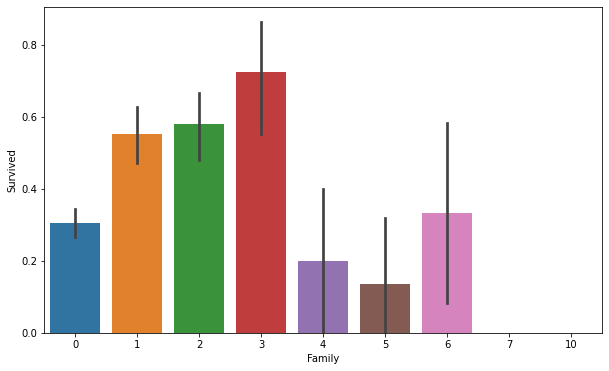

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Family', y='Survived', data = df)

Family with more numbers of members have more survival rate

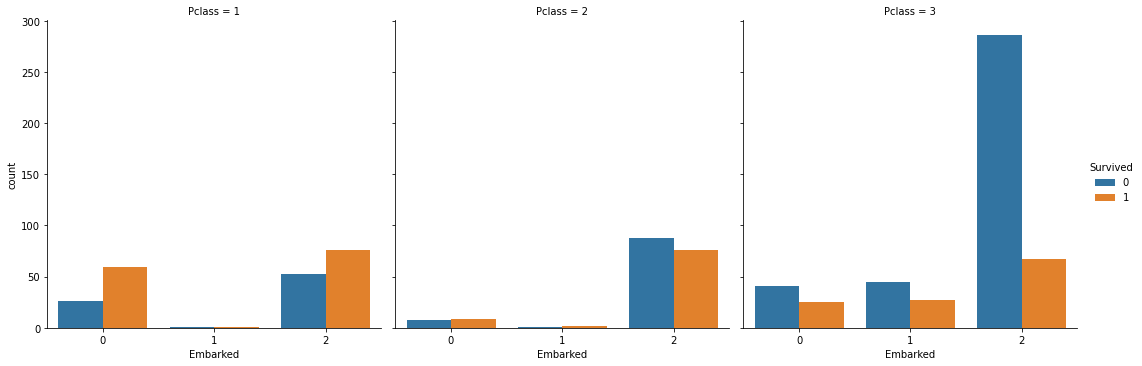

In [25]:
sns.catplot(data = df,x = 'Embarked',hue = 'Survived',
           kind = 'count',col = 'Pclass')

In Pclass 1 passengers embarked from 'c' & 's' have more survival rate and 'q' has less survival rate

In Pclass 2 passengers embarked from 'c' & 'q' are less so survival rate are qual and from 's' have less survival rate 
   
In Pclass 3 passengers embarked from 'c' ,'s' , 'q' all have less survival rate and passengers Embarked from 's' in pclas = 3 are moslty dead

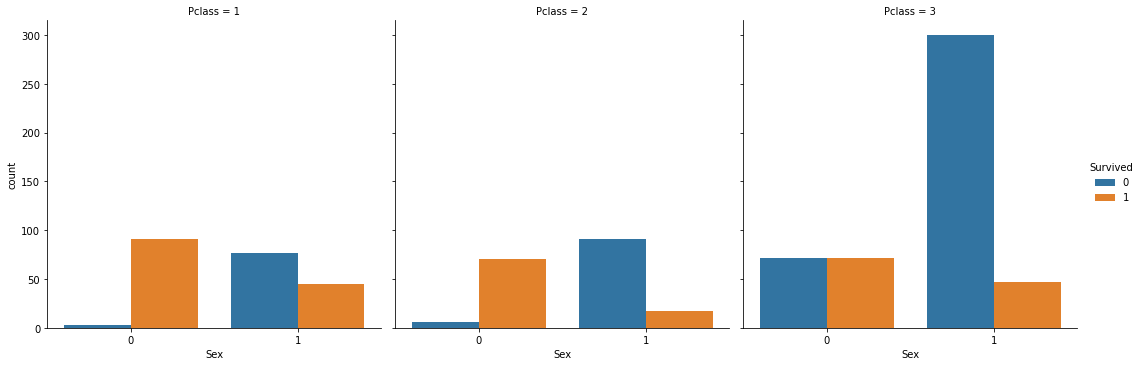

In [26]:
sns.catplot(data =df, x= 'Sex',hue ='Survived',
           kind = 'count',col = 'Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

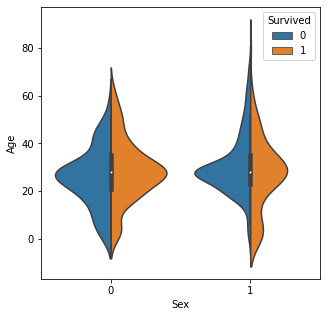

In [27]:
plt.figure(figsize=(5,5))
sns.violinplot(data =df ,x ='Sex',y ='Age',hue= 'Survived',split =True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is Good for children.High for women in the age range 20-50.Less for men as the age increases.

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

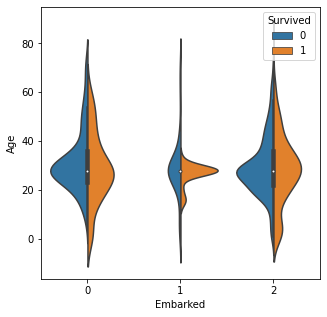

In [28]:
plt.figure(figsize=(5,5))
sns.violinplot(data =df ,x ='Embarked',y ='Age',hue= 'Survived',split =True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is good for (20 to 40) age range in all three stations.  and less as age increases

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

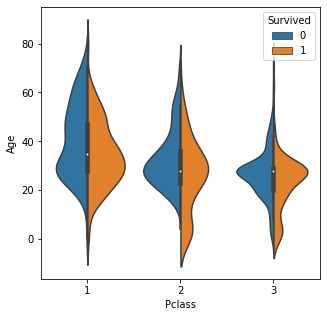

In [29]:
plt.figure(figsize=(5,5))
sns.violinplot(data =df ,x ='Pclass',y ='Age',hue= 'Survived',split =True)

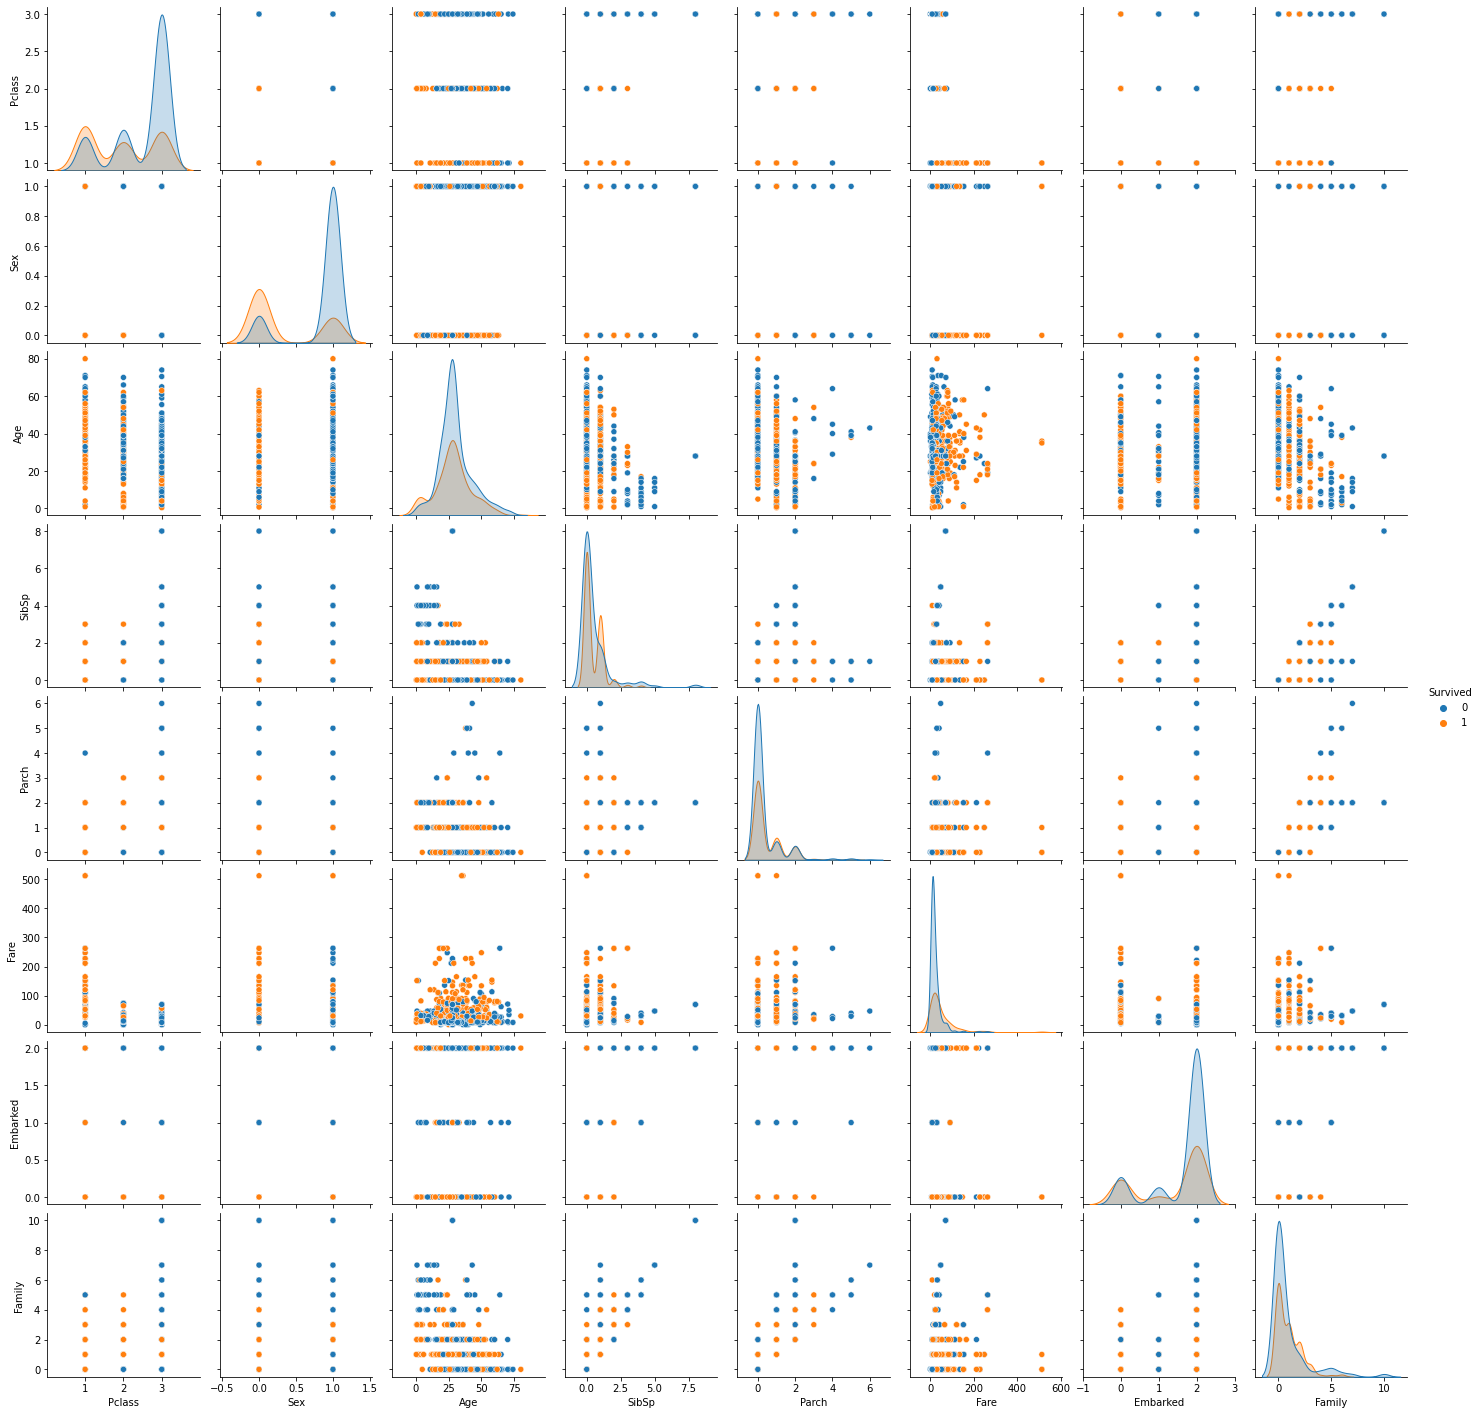

In [30]:
sns.pairplot(df,hue = 'Survived')

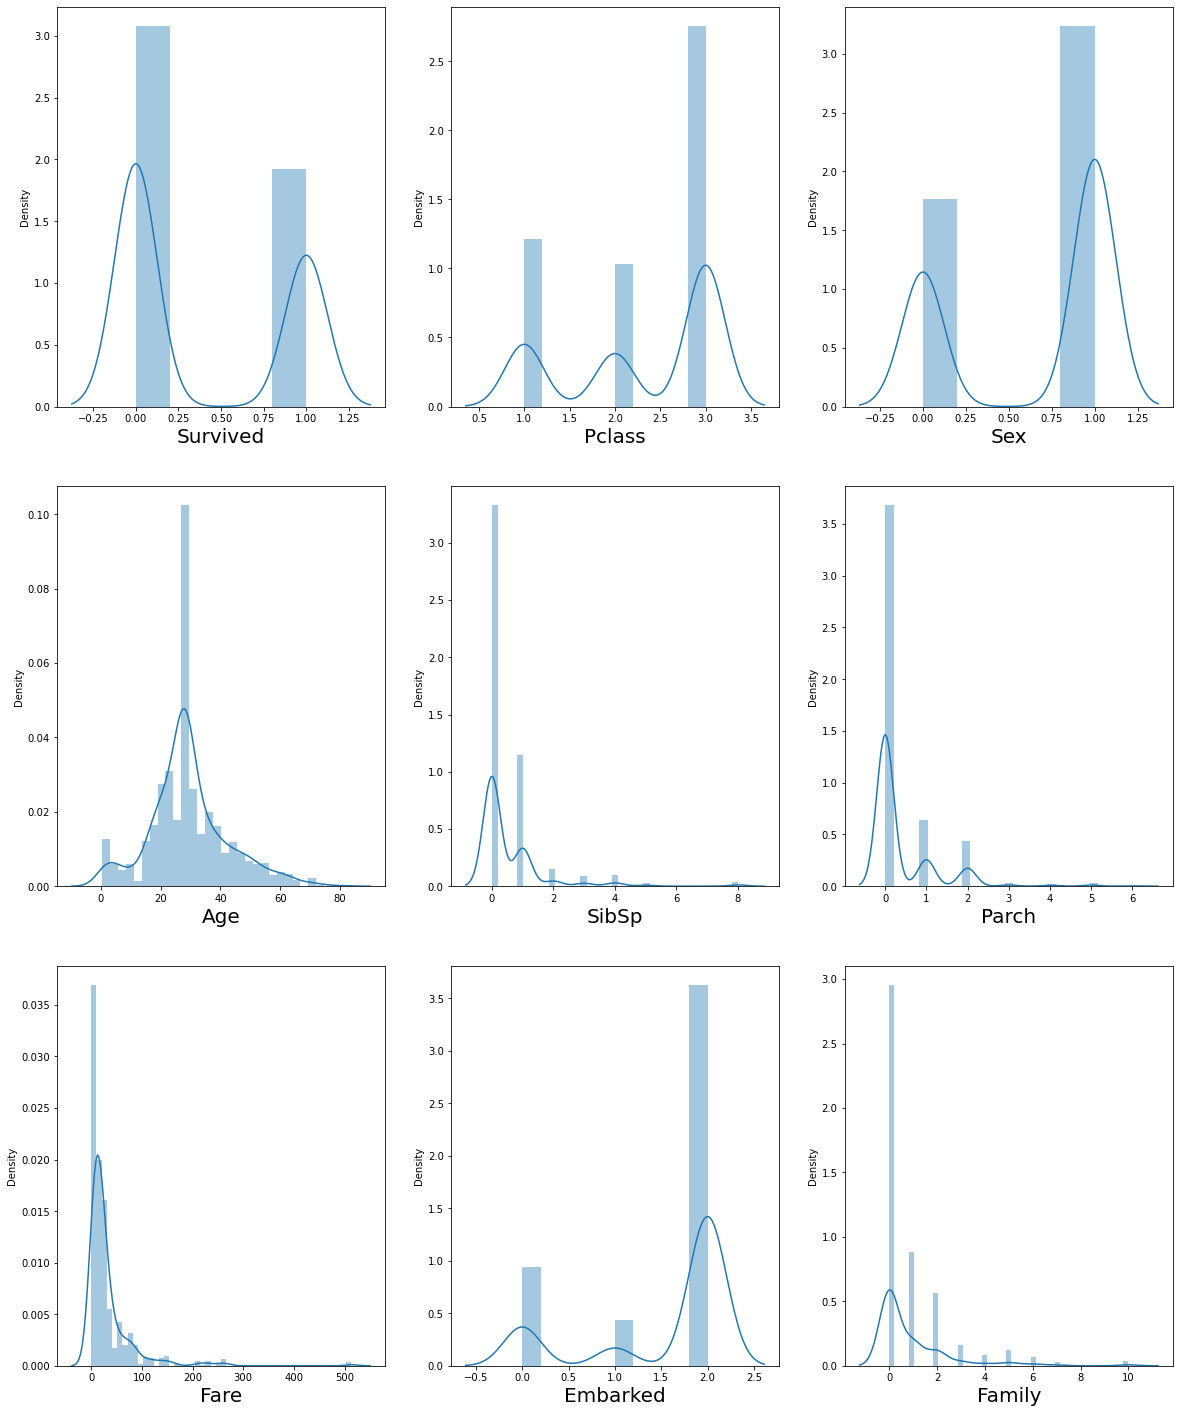

In [31]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

By observing the above most of the columns are not normally ddistributed

<AxesSubplot:>

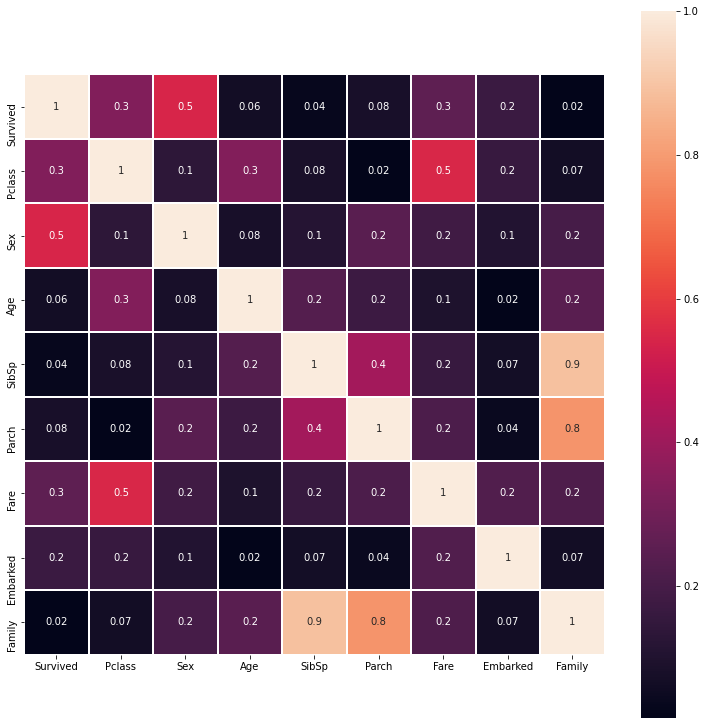

In [32]:
df_corr = df.corr().abs()
plt.figure(figsize = (13,13))
sns.heatmap(df_corr,annot = True,square = True,
           linewidth =1,fmt ='.1g')

There are only SibSp and Parch column have  more corelation 

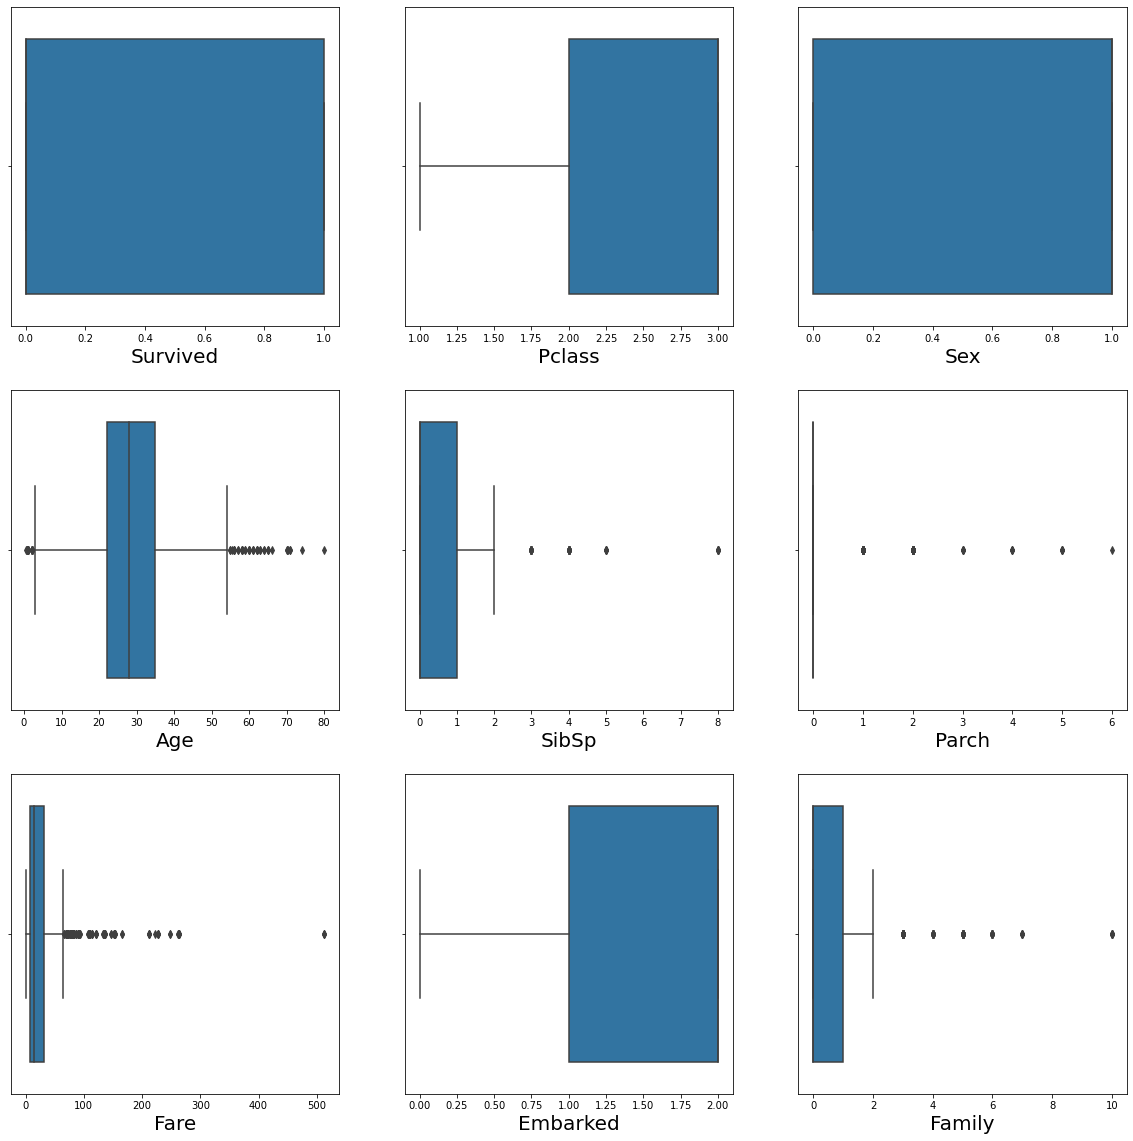

In [33]:
plt.figure(figsize=(20,20))
graph = 1

for column in df:
    if graph <= 9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df[column],orient = 'v')
        plt.xlabel(column,fontsize = 20)
    graph += 1
plt.show()

Most of the columns have outliers but there are most columns have nominal data so it doesnt matter for those coluumn who have nominal data . but there are two columns 'Age' and 'Fare' have ordinal data so we have to remove outliers for those columns

In [34]:
#finding boundary values
print('Highest allowed',df['Age'].mean()+3*df['Age'].std())
print('Highest allowed',df['Fare'].mean()+3*df['Fare'].std())

Highest allowed 68.42067214450208
Highest allowed 181.2844937601173


people age more than 68 are outliers &
fare more than 181 are outliers

In [35]:
df[(df['Age']>68.48)|(df['Fare']>181.24)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
27,0,1,1,19.0,3,2,263.0000,2,5
88,1,1,0,23.0,3,2,263.0000,2,5
96,0,1,1,71.0,0,0,34.6542,0,0
116,0,3,1,70.5,0,0,7.7500,1,0
118,0,1,1,24.0,0,1,247.5208,0,1
258,1,1,0,35.0,0,0,512.3292,0,0
299,1,1,0,50.0,0,1,247.5208,0,1
311,1,1,0,18.0,2,2,262.3750,0,4
341,1,1,0,24.0,3,2,263.0000,2,5
377,0,1,1,27.0,0,2,211.5000,0,2


These are the outliers columns

In [36]:
#remove outliers
new_df = df[(df['Age']<68.48)&(df['Fare']<181.24)]

In [37]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss :',(df.shape[0]-new_df.shape[0])/df.shape[0])

Shape Before and After
Shape Before: (891, 9)
Shape After: (864, 9)
Percentage Loss : 0.030303030303030304


In [38]:
#checking skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
Embarked   -1.328443
Family      2.806089
dtype: float64

Most of the columns have skewness but we only to remove skewness for Fare column because all other columns have nominal data

In [41]:
#Removing skewness
new_df['Fare']  = np.sqrt(new_df['Fare'])

In [42]:
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare       -0.074955
Embarked   -1.328443
Family      2.806089
dtype: float64

In [43]:
#Splitting the data
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [44]:
#Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [45]:
#finding best random state
maxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ',maxAccu,'on Random State',maxRS)

Best accuracy is  0.8789237668161435 on Random State 150


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

Accuracy Score : 0.8789237668161435
Confusion Matrix:
 [[123  11]
 [ 16  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223

roc_auc_score: 0.8690675834311589


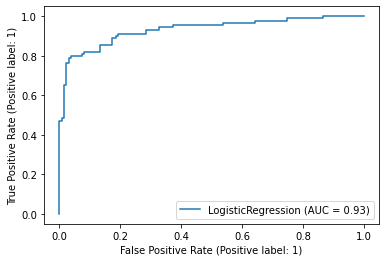

In [47]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
LRAS = accuracy_score(y_test,predlr)
print('Accuracy Score :',LRAS)
print('Confusion Matrix:\n',confusion_matrix(y_test,predlr))
print('Classification Report:\n',classification_report(y_test,predlr))
print('roc_auc_score:',roc_auc_score(y_test,predlr))

metrics.plot_roc_curve(lr,x_test,y_test)
plt.show()


Accuracy Score : 0.8609865470852018
Confusion Matrix:
 [[121  13]
 [ 18  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       134
           1       0.85      0.80      0.82        89

    accuracy                           0.86       223
   macro avg       0.86      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223

roc_auc_score: 0.8503689418078149


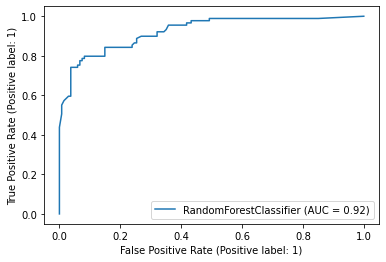

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFAS = accuracy_score(y_test,predrf)
print('Accuracy Score :',RFAS)
print('Confusion Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification Report:\n',classification_report(y_test,predrf))
print('roc_auc_score:',roc_auc_score(y_test,predrf))

metrics.plot_roc_curve(rf,x_test,y_test)
plt.show()


Accuracy Score : 0.8430493273542601
Confusion Matrix:
 [[115  19]
 [ 16  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       134
           1       0.79      0.82      0.81        89

    accuracy                           0.84       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.84      0.84      0.84       223

roc_auc_score: 0.8392168371625021


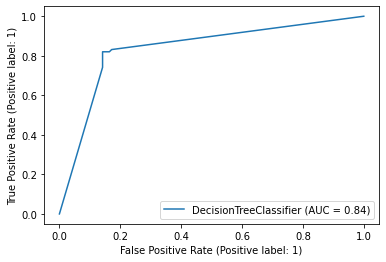

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTAS = accuracy_score(y_test,preddt)
print('Accuracy Score :',DTAS)
print('Confusion Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification Report:\n',classification_report(y_test,preddt))
print('roc_auc_score:',roc_auc_score(y_test,preddt))

metrics.plot_roc_curve(dt,x_test,y_test)
plt.show()


Accuracy Score : 0.8878923766816144
Confusion Matrix:
 [[126   8]
 [ 17  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       134
           1       0.90      0.81      0.85        89

    accuracy                           0.89       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223

roc_auc_score: 0.8746436357538152


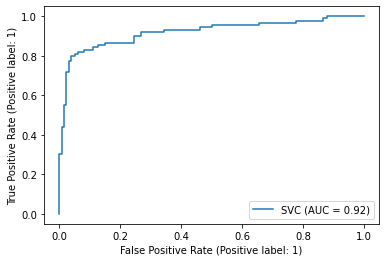

In [51]:
SVC = SVC()
SVC.fit(x_train,y_train)
predsvc = SVC.predict(x_test)
SVCAS = accuracy_score(y_test,predsvc)
print('Accuracy Score :',SVCAS)
print('Confusion Matrix:\n',confusion_matrix(y_test,predsvc))
print('Classification Report:\n',classification_report(y_test,predsvc))
print('roc_auc_score:',roc_auc_score(y_test,predsvc))

metrics.plot_roc_curve(SVC,x_test,y_test)
plt.show()


Accuracy Score : 0.8430493273542601
Confusion Matrix:
 [[123  11]
 [ 24  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       134
           1       0.86      0.73      0.79        89

    accuracy                           0.84       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

roc_auc_score: 0.8241237632064398


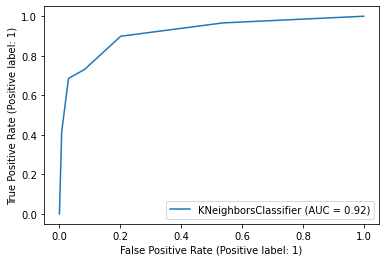

In [52]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNAS =accuracy_score(y_test,predknn)
print('Accuracy Score :',KNNAS)
print('Confusion Matrix:\n',confusion_matrix(y_test,predknn))
print('Classification Report:\n',classification_report(y_test,predknn))
print('roc_auc_score:',roc_auc_score(y_test,predknn))

metrics.plot_roc_curve(KNN,x_test,y_test)
plt.show()


In [53]:
LRCV = cross_val_score(lr,x,y,cv = 5)
print('Cross Validation Score of LogisticRegression is',LRCV.mean())

Cross Validation Score of LogisticRegression is 0.7890025735986442


In [54]:
RFCV = cross_val_score(rf,x,y,cv = 5)
print('Cross Validation Score of RandomForestClassifier is',RFCV.mean())

Cross Validation Score of RandomForestClassifier is 0.8025171050153788


In [55]:
DTCV = cross_val_score(dt,x,y,cv = 5)
print('Cross Validation Score of DecisionTreeClassifier is',DTCV.mean())

Cross Validation Score of DecisionTreeClassifier is 0.7833971502102819


In [56]:
SVCCV = cross_val_score(SVC,x,y,cv = 5)
print('Cross Validation Score of SupportVectorClassifier is',SVCCV.mean())

Cross Validation Score of SupportVectorClassifier is 0.6701337015880988


In [57]:
KNNCV = cross_val_score(KNN,x,y,cv = 5)
print('Cross Validation Score of KNeighborsClassifier is',KNNCV.mean())

Cross Validation Score of KNeighborsClassifier is 0.7026238152030632


In [58]:
#Checking differnce between Acc_score and CV_score of the models
print('Difference between acc_score and Cross_val_score of LogisticRgression is',LRAS-(LRCV.mean()))
print('Difference between acc_score and Cross_val_score of RandomForestClassifer is',RFAS-(RFCV.mean()))
print('Difference between acc_score and Cross_val_score of DecisionTreeClassifer is',DTAS-(DTCV.mean()))
print('Difference between acc_score and Cross_val_score of SVC is',SVCAS-(SVCCV.mean()))
print('Difference between acc_score and Cross_val_score of KNN is',KNNAS-(KNNCV.mean()))


Difference between acc_score and Cross_val_score of LogisticRgression is 0.08992119321749925
Difference between acc_score and Cross_val_score of RandomForestClassifer is 0.058469442069823074
Difference between acc_score and Cross_val_score of DecisionTreeClassifer is 0.05965217714397819
Difference between acc_score and Cross_val_score of SVC is 0.21775867509351554
Difference between acc_score and Cross_val_score of KNN is 0.14042551215119692


By checking difference between acc and Cv score we get RandomForestClassifier with less difference

In [59]:
#Adding parameters 
parameters = {'n_estimators':[20,30,40,50,60,10],
              'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,6],
              'max_features':['auto','sqrt','log2']}

In [60]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 30, 40, 50, 60, 10]})

In [61]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 40}

By using GridSearchCV to the RandomForest we get best params 

Accuracy Score of the final Model: 88.78923766816143
Cross Validation Score of FinalModel is 82.15491808423828
Confusion Matrix:
 [[130   4]
 [ 21  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       134
           1       0.94      0.76      0.84        89

    accuracy                           0.89       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223

roc_auc_score: 86.7097098775784


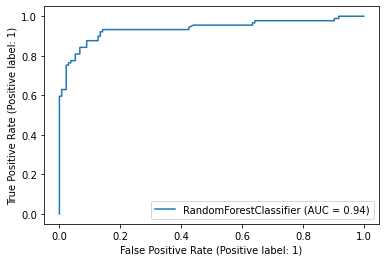

In [62]:
finalmod = RandomForestClassifier(criterion = 'entropy',max_depth =5, max_features = 'log2',n_estimators = 40)

finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('Accuracy Score of the final Model:',accuracy_score(y_test,pred)*100)
finalmodCV = cross_val_score(finalmod,x,y,cv = 5)
print('Cross Validation Score of FinalModel is',finalmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(finalmod,x_test,y_test)
plt.show()


Using best params to RandomForestClassifier in result we get 88.78 accuracy score

In [63]:
import joblib
joblib.dump(finalmod,'TitanicProjecct.pkl')

['TitanicProjecct.pkl']